<a href="https://colab.research.google.com/github/sweta8144/Internship-Goeduhub/blob/main/Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Task 9**

**Name - Sweta Lenka**

**Reg no. - GO_STP_11510**

**Predict retention of an employee within an organization such that whether the employee will leave the company or continue with it. An organization is only as good as its employees, and these people are the true source of its competitive advantage.**

**First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using Machine Learning & Python.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


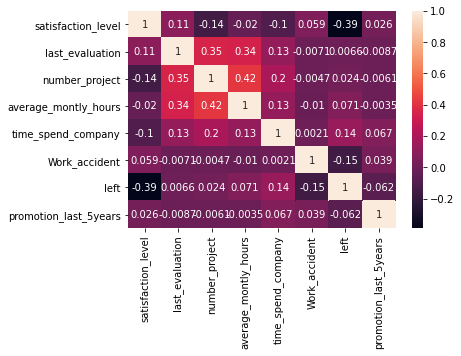

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [ ]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
for column in df.columns:
  if df[column].dtype == object:
    print(str(column) + ' : ' + str(df[column].unique()))
    print(df[column].value_counts())
    print('_____________________________________')

Department : ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64
_____________________________________
salary : ['low' 'medium' 'high']
low       7316
medium    6446
high      1237
Name: salary, dtype: int64
_____________________________________


In [ ]:
left_grp_mean = df.groupby('left').mean()
left_grp_mean

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


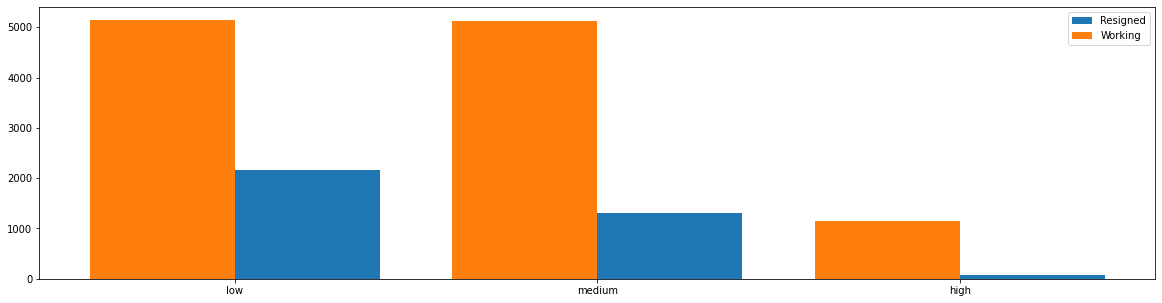

In [ ]:
X=df.groupby('left').get_group(1).salary.value_counts().index
x=np.arange(len(X))
plt.figure(figsize=(20,5))
plt.bar(x+0.2,df.groupby('left').get_group(1).salary.value_counts().values,width=0.4,label='Resigned')
plt.bar(x-0.2,df.groupby('left').get_group(0).salary.value_counts().values,width=0.4,label='Working')
plt.xticks(x,X)
plt.legend()
plt.show()


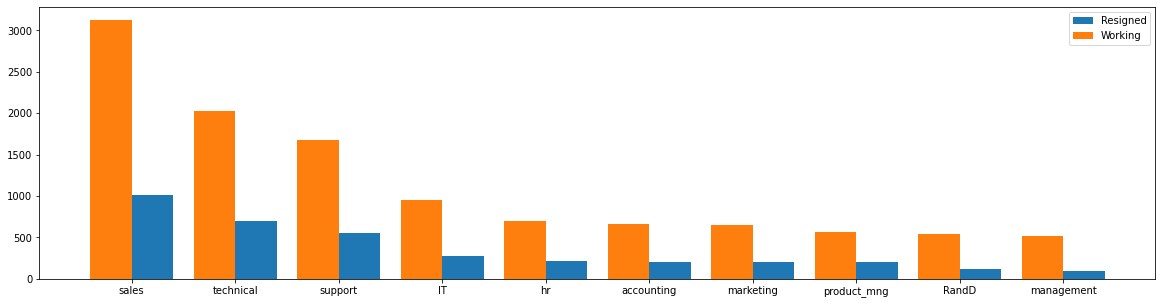

In [ ]:
X=df.groupby('left').get_group(1).Department.value_counts().index
x=np.arange(len(X))
plt.figure(figsize=(20,5))
plt.bar(x+0.2,df.groupby('left').get_group(1).Department.value_counts().values,width=0.4,label='Resigned')
plt.bar(x-0.2,df.groupby('left').get_group(0).Department.value_counts().values,width=0.4,label='Working')
plt.xticks(x,X)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
Label_encoder_depart=LabelEncoder()
Label_encoder_salary=LabelEncoder()
Department=Label_encoder_depart.fit_transform(df["Department"])
salary=Label_encoder_salary.fit_transform(df["salary"])

In [ ]:
df["Department"]=Department
df["salary"]=salary

In [ ]:
t=df["left"]
df=df.drop(["left"],axis="columns")

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.loc[:].values,t,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model.predict(x_test )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(x_test,y_test)

0.773